<a href="https://colab.research.google.com/github/ArashDehghanyan/markov_poem/blob/master/topic_modeling_lda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving abcnews-date-text.csv to abcnews-date-text (1).csv


KeyboardInterrupt: ignored

In [0]:
import pandas as pd

data = pd.read_csv('abcnews-date-text.csv', error_bad_lines = False)
data_text = data[['headline_text']]
data_text['index'] = data_text.index
documents = data_text

print( len(documents) )
print(documents[:5])

49771
                                       headline_text  index
0  aba decides against community broadcasting lic...      0
1     act fire witnesses must be aware of defamation      1
2     a g calls for infrastructure protection summit      2
3           air nz staff in aust strike for pay rise      3
4      air nz strike to affect australian travellers      4


In [0]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem import *
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
stemmer = PorterStemmer()

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
# Perform lemmatizing and preprocessing
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS and len(token)>3:
            result.append(lemmatize_stemming(token))
    return result

In [0]:
# Select a document to preview after preprocessing
doc_sample = documents[documents['index'] == 4301].values[0][0]

print('Original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\nTokenized and lemmatized document: ')
print(preprocess(doc_sample))

Original document: 
['prison', 'decision', 'saves', 'hundreds', 'of', 'jobs']


Tokenized and lemmatized document: 
['prison', 'decis', 'save', 'hundr', 'job']


In [0]:
processed_docs = documents['headline_text'].map(preprocess)
processed_docs.head(5)

0        [decid, commun, broadcast, licenc]
1                        [wit, awar, defam]
2    [call, infrastructur, protect, summit]
3               [staff, aust, strike, rise]
4      [strike, affect, australian, travel]
Name: headline_text, dtype: object

In [0]:
# BAG OF WORDS on the dataset
dictionary = gensim.corpora.Dictionary(processed_docs)

count = 0
for k,v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

        

0 broadcast
1 commun
2 decid
3 licenc
4 awar
5 defam
6 wit
7 call
8 infrastructur
9 protect
10 summit


In [0]:
# filter out gensim extremes
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
# gensim doc2bow
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(136, 1), (205, 1), (245, 1), (492, 1), (686, 1), (2039, 1)]

In [0]:
# Preview BOW for our sample
bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], bow_doc_4310[i][1]))
    

Word 136 ("govt") appears 1 time.
Word 205 ("group") appears 1 time.
Word 245 ("vote") appears 1 time.
Word 492 ("local") appears 1 time.
Word 686 ("want") appears 1 time.
Word 2039 ("ratepay") appears 1 time.


In [0]:
# Create TF-IDF 
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break
    

[(0, 0.5730582281646646),
 (1, 0.3967219325524022),
 (2, 0.4947736027192055),
 (3, 0.5190520758237273)]


In [0]:
# Running LDA using Bag of Words
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, 
                                       id2word=dictionary, passes=2, workers=2)
# For each topic, we will explore the words occuring in that topic and its relative weight
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))

Topic: 0 
Words: 0.017*"iraqi" + 0.014*"death" + 0.014*"continu" + 0.012*"baghdad" + 0.011*"battl" + 0.009*"forc" + 0.009*"rise" + 0.009*"move" + 0.009*"india" + 0.009*"raid"
Topic: 1 
Words: 0.037*"iraq" + 0.024*"reject" + 0.018*"deal" + 0.017*"claim" + 0.013*"bush" + 0.013*"talk" + 0.013*"push" + 0.011*"resid" + 0.010*"worker" + 0.010*"govt"
Topic: 2 
Words: 0.023*"consid" + 0.016*"strike" + 0.015*"plan" + 0.011*"council" + 0.010*"question" + 0.010*"highlight" + 0.010*"port" + 0.009*"sale" + 0.009*"woe" + 0.009*"nuclear"
Topic: 3 
Words: 0.018*"england" + 0.016*"aussi" + 0.012*"home" + 0.012*"decis" + 0.011*"match" + 0.011*"want" + 0.010*"group" + 0.010*"play" + 0.010*"drop" + 0.010*"fail"
Topic: 4 
Words: 0.061*"polic" + 0.028*"crash" + 0.024*"probe" + 0.019*"investig" + 0.019*"lead" + 0.016*"record" + 0.013*"chief" + 0.010*"confid" + 0.010*"death" + 0.009*"injuri"
Topic: 5 
Words: 0.019*"chang" + 0.019*"miss" + 0.017*"return" + 0.017*"call" + 0.016*"farmer" + 0.015*"industri" + 0.0

In [0]:
# Running LDA using TF-IDF
import time
start = time.time()
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary,
                                            passes=2, workers=4)
print("LDA model during {} sec.".format(time.time()-start))
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))

LDA model during 23.277961254119873 sec.
Topic: 0 
Words: 0.011*"hospit" + 0.008*"gold" + 0.008*"drought" + 0.007*"plan" + 0.007*"court" + 0.007*"appeal" + 0.007*"test" + 0.006*"woman" + 0.006*"jail" + 0.006*"toll"
Topic: 1 
Words: 0.011*"polic" + 0.009*"sheep" + 0.008*"wallabi" + 0.007*"defend" + 0.007*"solomon" + 0.007*"offic" + 0.006*"highway" + 0.006*"plan" + 0.006*"assault" + 0.006*"murder"
Topic: 2 
Words: 0.011*"charg" + 0.011*"council" + 0.010*"court" + 0.010*"face" + 0.010*"plan" + 0.006*"back" + 0.006*"restrict" + 0.006*"challeng" + 0.006*"welcom" + 0.006*"water"
Topic: 3 
Words: 0.012*"kill" + 0.010*"bomb" + 0.008*"iraq" + 0.008*"injur" + 0.007*"polic" + 0.007*"home" + 0.007*"blast" + 0.007*"meet" + 0.007*"bali" + 0.007*"discuss"
Topic: 4 
Words: 0.016*"england" + 0.007*"korea" + 0.007*"tour" + 0.006*"disput" + 0.006*"canada" + 0.006*"plan" + 0.006*"talk" + 0.005*"north" + 0.005*"clear" + 0.005*"land"
Topic: 5 
Words: 0.008*"boost" + 0.008*"prepar" + 0.007*"die" + 0.007*"fed

In [0]:
# Performance evaluation by classifying sample document using LDA Bag of Words model
processed_docs[4310]

In [0]:
for index,score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {} \t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))

In [0]:
# Performance evaluation by classifying sample document using LDA TF-IDF model.
for index,score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {} \t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))

In [0]:
# Testing model on unseen document
unseen_doc = "How a Pentagon deal became an identity crisis for Google"
bow_vector = dictionary.doc2bow(preprocess(unseen_doc))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {} \t Topic: {}".format(score, lda_model.print_topic(index, 5)))

In [0]:
tfidf_vector = tfidf[bow_vector]
for index, score in sorted(lda_model_tfidf[tfidf_vector], key=lambda tup: -1*tup[1]):
    print("Score: {} \t Topic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))

In [0]:
# Compute coherence score
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print("\nCoherence Score: ", coherence_lda)


Coherence Score:  0.4096116081666018


In [0]:
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print("\nCoherence Score: ", coherence_lda)


Coherence Score:  0.4772507189833449


In [0]:
lda_model.save("lda_bow.model")

In [0]:
lda_model_tfidf.save("lda_tfidf.model")

In [0]:
new_doc = ["dance is my favourite hobby", "the vollyball is played with a ball", 
           "the price of petrol is rising nowadays", "the past century was the evolution of physics and mathematics",
          "English is the most common language", "I want to buy a smart watch"]
new_vector = [dictionary.doc2bow(preprocess(doc)) for doc in new_doc]
for i in range(0, len(new_vector)):
    print("\nSentence {}: ".format(i)+new_doc[i])
    for index, score in sorted(lda_model_tfidf[new_vector[i]], key=lambda tup: -1*tup[1]):
        print("\nScore: {} \tTopic index: {}\t".format(score,index,)+', '.join([v[0] for v in lda_model_tfidf.show_topic(index, 10)]))
        break

In [0]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           #random_state=100,
                                           #chunksize=100,
                                           passes=2,
                                           alpha=a,
                                           eta=b,
                                           #per_word_topics=True
                                           workers=4
                                          )
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [0]:
import numpy as np
import tqdm

# Topics range
min_topics = 5
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(bow_corpus)
corpus_sets = [corpus_tfidf,
               bow_corpus]
corpus_title = ['TF-IDF Corpus', 'BOW Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
while True:
    pbar = tqdm.tqdm(total=400)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()
    break



  0%|          | 0/400 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)

 90%|█████████ | 360/400 [2:51:42<19:04, 28.62s/it]


In [1]:
from google.colab import files
files.upload()


Saving lda_tuning_results.csv to lda_tuning_results.csv


{'lda_tuning_results.csv': b'Validation_Set,Topics,Alpha,Beta,Coherence\nTF-IDF Corpus,5,0.01,0.01,0.41937007719711117\nTF-IDF Corpus,5,0.01,0.31,0.431889043785167\nTF-IDF Corpus,5,0.01,0.61,0.37008047894537255\nTF-IDF Corpus,5,0.01,0.9099999999999999,0.3984467299659415\nTF-IDF Corpus,5,0.01,symmetric,0.3997829718227543\nTF-IDF Corpus,5,0.31,0.01,0.4383771428427501\nTF-IDF Corpus,5,0.31,0.31,0.43222906185580146\nTF-IDF Corpus,5,0.31,0.61,0.4517115278693387\nTF-IDF Corpus,5,0.31,0.9099999999999999,0.4307045885218092\nTF-IDF Corpus,5,0.31,symmetric,0.44785353310897\nTF-IDF Corpus,5,0.61,0.01,0.43865554556703923\nTF-IDF Corpus,5,0.61,0.31,0.4467118740047014\nTF-IDF Corpus,5,0.61,0.61,0.47386429190362483\nTF-IDF Corpus,5,0.61,0.9099999999999999,0.442779004115798\nTF-IDF Corpus,5,0.61,symmetric,0.4262433636003366\nTF-IDF Corpus,5,0.9099999999999999,0.01,0.44209850810069673\nTF-IDF Corpus,5,0.9099999999999999,0.31,0.4325582183966864\nTF-IDF Corpus,5,0.9099999999999999,0.61,0.4361916665845683

In [56]:
import pandas as pd
import numpy as np

lda_df = pd.read_csv("lda_tuning_results.csv", encoding='utf-8')
idx = lda_df[ lda_df['Beta']=='0.01' ]
idx = idx[idx['Alpha']=='0.01']
idx_tfidf = idx[idx['Validation_Set']=='TF-IDF Corpus']
print(idx_tfidf)
idx = lda_df[ lda_df['Beta']=='0.01' ]
idx = idx[idx['Alpha']=='0.01']
idx_bow = idx[idx['Validation_Set']=='BOW Corpus']
print(idx_bow)

    Validation_Set  Topics Alpha  Beta  Coherence
0    TF-IDF Corpus       5  0.01  0.01   0.419370
30   TF-IDF Corpus       6  0.01  0.01   0.361603
60   TF-IDF Corpus       7  0.01  0.01   0.407156
90   TF-IDF Corpus       8  0.01  0.01   0.463003
120  TF-IDF Corpus       9  0.01  0.01   0.413688
150  TF-IDF Corpus      10  0.01  0.01   0.450406
    Validation_Set  Topics Alpha  Beta  Coherence
180     BOW Corpus       5  0.01  0.01   0.397021
210     BOW Corpus       6  0.01  0.01   0.419580
240     BOW Corpus       7  0.01  0.01   0.391002
270     BOW Corpus       8  0.01  0.01   0.388500
300     BOW Corpus       9  0.01  0.01   0.401105
330     BOW Corpus      10  0.01  0.01   0.398464


Text(0, 0.5, 'Coherence Score')

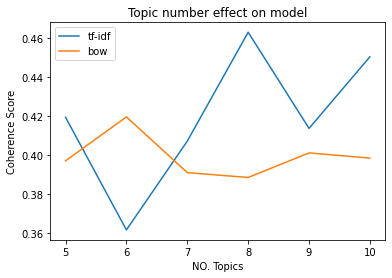

In [58]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.plot(idx_tfidf['Topics'], idx_tfidf['Coherence'])
plt.plot(idx_bow['Topics'], idx_bow['Coherence'])
plt.legend(['tf-idf', 'bow'], loc='best')
plt.title("Topic number effect on model")
plt.xlabel("NO. Topics")
plt.ylabel("Coherence Score")

In [88]:
indx = lda_df[lda_df['Topics']==7]
indx = indx[indx['Alpha'] == 'asymmetric']
indx_tfidf = indx[indx['Validation_Set'] == 'TF-IDF Corpus']
print( indx_tfidf )
print('\n')
indx_bow = indx[indx['Validation_Set']=='BOW Corpus']
print(indx_bow)

   Validation_Set  Topics       Alpha                Beta  Coherence
85  TF-IDF Corpus       7  asymmetric                0.01   0.501058
86  TF-IDF Corpus       7  asymmetric                0.31   0.597865
87  TF-IDF Corpus       7  asymmetric                0.61   0.616128
88  TF-IDF Corpus       7  asymmetric  0.9099999999999999   0.583620
89  TF-IDF Corpus       7  asymmetric           symmetric   0.518425


    Validation_Set  Topics       Alpha                Beta  Coherence
265     BOW Corpus       7  asymmetric                0.01   0.377170
266     BOW Corpus       7  asymmetric                0.31   0.406784
267     BOW Corpus       7  asymmetric                0.61   0.411194
268     BOW Corpus       7  asymmetric  0.9099999999999999   0.400965
269     BOW Corpus       7  asymmetric           symmetric   0.392621


Text(0, 0.5, 'Coherence')

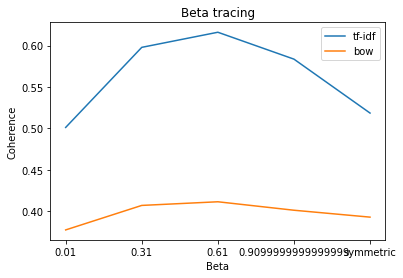

In [89]:
plt.plot(indx_tfidf['Beta'], indx_tfidf['Coherence'],label='tf-idf')
plt.plot(indx_bow['Beta'], indx_bow['Coherence'], label='bow')
plt.legend(loc='best')
plt.title("Beta tracing")
plt.xlabel("Beta")
plt.ylabel("Coherence")

In [85]:
best = lda_df[lda_df['Coherence'] == max(lda_df['Coherence'])]
best

,Validation_Set,Topics,Alpha,Beta,Coherence
87,TF-IDF Corpus,7,asymmetric,0.61,0.616128
